# Calculadora de vigas - Andrés Felipe Cuscagua López

- Profesor: Jorge Eliecer Campuzano
- Materia: Analisis Estructural

### Paquetes utilizados

In [1]:
import numpy as np                 # Paquete para operar matrices usado en python
import alphas3Momentos as tablas   # Modulo que tiene las formulas de los 3 momentos para los alphas (desarrollado)
import Viga                        # Modulo para crear la estructura de datos "Viga" (desarrollado)
from diagramas import graficador   # Modulo para graficar los momentos de la viga (desarrollado)

### Se crea una viga y se pasa la información de cada tramo.

In [2]:
Mi_viga = Viga.Viga()

Cuantos tramos tiene la viga: 2


In [6]:
Mi_viga.definir_tramo(2)

Ingresando tramo: 2
Es un voladizo?: no
Es un empotramiento?: no
Cuantas cargas hay en el tramo?: 2
Escriba el tipo de la carga 1: puntual
Escriba la magnitud de la carga: 15
Escriba la distancia de la carga al extremo izquierdo del tramo: 10
----
Escriba el tipo de la carga 2: distribuida
Escriba la magnitud de la carga: 4.5
Escriba la distancia de la carga al extremo izquierdo del tramo: 0
Escriba la longitud de la carga: 16
----
Escriba la longitud del tramo: 16


In [7]:
Tramos = Mi_viga.tramos
Tramos

[{'voladizo': 'no',
  'empotrado': 'no',
  'cargas': {'carga 1': {'tipo': 'puntual',
    'magnitud': 5.0,
    'distancia': 3.0}},
  'n_cargas': 1,
  'L': 8.0},
 {'voladizo': 'no',
  'empotrado': 'no',
  'cargas': {'carga 1': {'tipo': 'puntual',
    'magnitud': 15.0,
    'distancia': 10.0},
   'carga 2': {'tipo': 'distribuida',
    'magnitud': 4.5,
    'distancia': 0.0,
    'longitud': 16.0}},
  'n_cargas': 2,
  'L': 16.0}]

### Se calculan los momentos

In [8]:
Mi_viga.momentos = Viga.calcular_momentos(Tramos)
Mi_viga.momentos

[0, -123.9296875, 0]

### Se calculan las reacciones

In [9]:
Mi_viga.Rs = Viga.obtener_Rs(Tramos, Mi_viga.momentos)
Mi_viga.Rs

array([-12.36621094,  66.73681641,  37.62939453])

### Se Inicializa el graficador

In [10]:
Graficas = graficador(Mi_viga)

### Gráfica de la Cortante

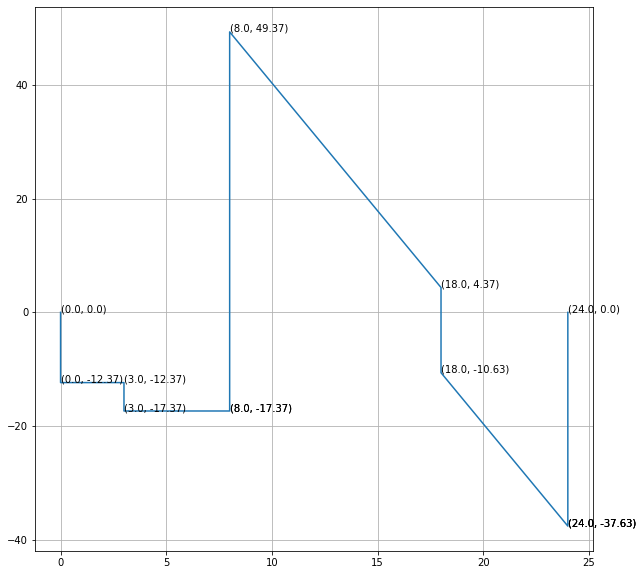

In [11]:
Graficas.grafica_cortante()

In [16]:
Graficas.plot_momento['X'].values[-1]

24.0

In [ ]:
np.trapz()

In [64]:
integral = [0]

for i in range(Graficas.plot_momento.shape[0]-1):
    p1 = Graficas.plot_momento.iloc[i,[1,2]]
    p2 = Graficas.plot_momento.iloc[i+1,[1,2]]
    
    if p1['X'] == p2['X']:
        integral.append(0)
    elif p1['Y'] == p2['Y']:
        x = np.array([x for x in np.arange(0, p2['X'] - p1['X'],0.1)])
        integral += (x * p1['Y']).tolist()

ValueError: x and y must have same first dimension, but have shapes (240,) and (89,)

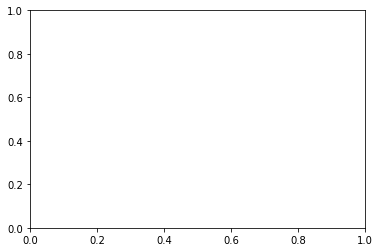

In [65]:
plt.figure()
plt.plot(list(range(len(np.arange(0, p1['X'],0.1)))), integral)
plt.show()

In [49]:
np.arange(0, p2['X'] - p1['X'],0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])

In [12]:
Graficas.plot_momento

,tipo,X,Y
0,nada,0,0
1,reaccion,0,-12.3662
2,nada,3,-12.3662
3,puntual,3,-17.3662
4,nada,8,-17.3662
5,nada,8,-17.3662
6,reaccion,8,49.3706
7,distribuida,18,4.37061
8,puntual,18,-10.6294
9,distribuida,24,-37.6294


In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
plot_momento = pd.read_excel('datos.xlsx')
plot_momento

,tipo,X,Y
0,nada,0,0.00000
1,reaccion,0,-12.36620
2,nada,3,-12.36620
3,puntual,3,-17.36620
4,nada,8,-17.36620
5,nada,8,-17.36620
6,reaccion,8,49.37060
7,distribuida,18,4.37061
8,puntual,18,-10.62940
9,distribuida,24,-37.62940


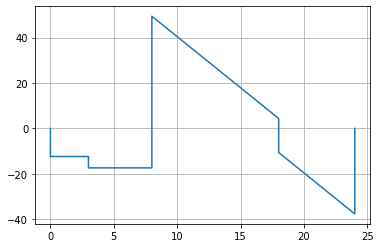

In [3]:
plt.figure()
plt.plot(plot_momento['X'], plot_momento['Y'])
plt.grid()
plt.show()

In [5]:
df = plot_momento.copy()

In [100]:
YY = []
XX = []

for i in range(0,df.shape[0] - 1):
    
    p1 = df.iloc[i,:]
    p2 = df.iloc[i+1,:]
    
    if p1['X'] == p2['X']:
        XX.append(np.array([0]))
        YY.append(np.array([0]))

    elif p1['Y'] == p2['Y']:
        x1 = 0
        y1 = 0             
        x2 = p2['X'] - p1['X']
        y2 = x2 * p2['Y']
        
        refx = np.linspace(0,x2)
        refy = (y2/x2) * (refx  - x2) + y2
        XX.append(refx)
        YY.append(refy)
    else:
        
        if p2['Y'] < 0 and p1['Y'] < 0:            
            refx = np.linspace(0, p2['X'] - p1['X'])
            
            a = (p2['Y'] - p1['Y']) / (2 * (p2['X'] - p1['X']))
            b = -p2['X'] * (p2['Y'] - p1['Y']) / (p2['X'] - p1['X'])
            d =  p2['Y']
            refy = (a * refx ** 2) + b * refx + d * refx
            XX.append(refx)
            YY.append(refy)
        else:
            refx = np.linspace(0, p2['X'] - p1['X'])

            a = (p2['Y'] - p1['Y']) / (2 * (p2['X'] - p1['X']))
            b = -p2['X'] * (p2['Y'] - p1['Y']) / (p2['X'] - p1['X'])
            d =  p2['Y']
            refy = (a * refx ** 2) + b * refx + d * refx

            XX.append(refx)
            YY.append(refy)           

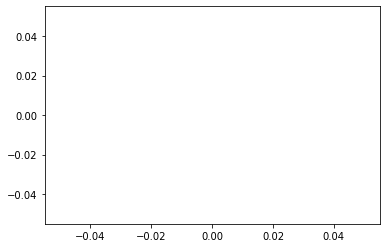

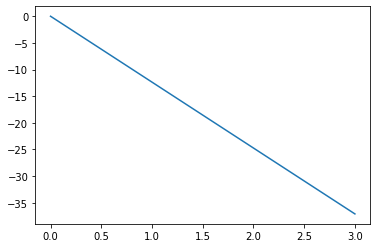

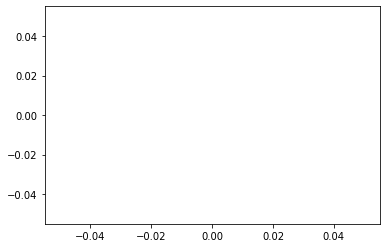

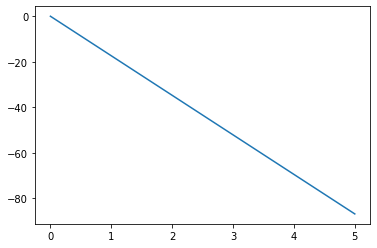

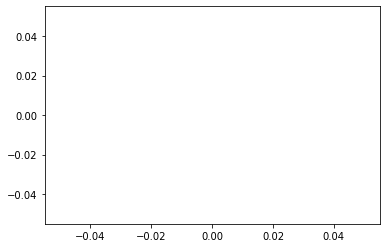

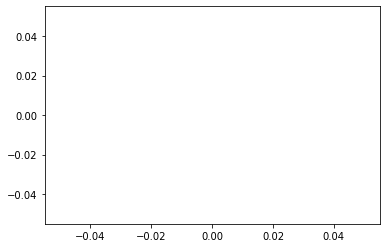

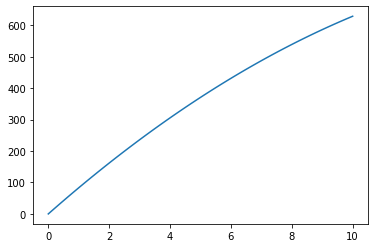

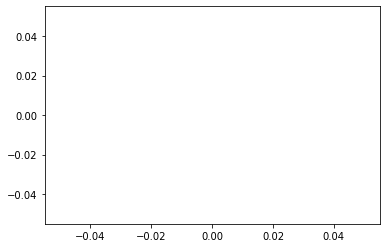

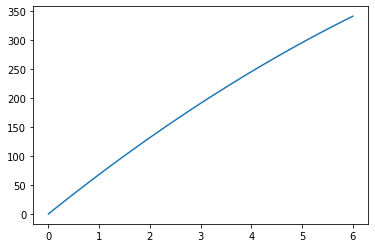

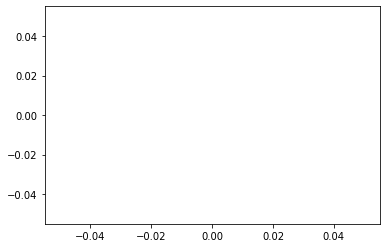

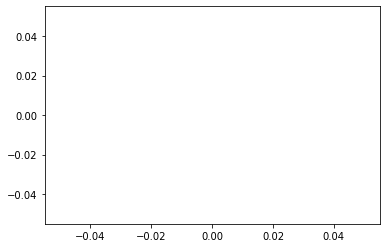

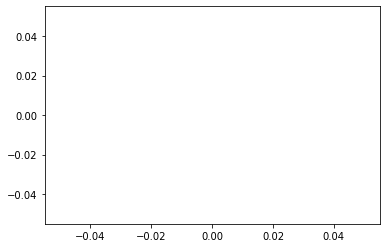

In [101]:
for i in range(len(XX)):
    plt.figure()
    plt.plot(XX[i], YY[i])
    plt.show()

In [111]:
len(XX[5])

1

In [112]:
XF = XX[0]
YF = YY[0]

for i in range(1,4):#len(XX)):
    if len(XX[i]) > 1:
        XF = np.concatenate((XF,XX[i]), axis = None)
        YF = np.concatenate((YF,YY[i] + YF[-1]), axis = None)

In [120]:
Final = pd.DataFrame()
Final['X'] = XF
Final['Y'] = YF
Final

,X,Y
0,0.000000,0.000000
1,0.000000,0.000000
2,0.061224,-0.757114
3,0.122449,-1.514229
4,0.183673,-2.271343
5,0.244898,-3.028457
6,0.306122,-3.785571
7,0.367347,-4.542686
8,0.428571,-5.299800
9,0.489796,-6.056914


In [114]:
(np.round(XF, decimals=2).cumsum()).tolist()

[0.0,
 0.0,
 0.06,
 0.18,
 0.36,
 0.6,
 0.9099999999999999,
 1.2799999999999998,
 1.7099999999999997,
 2.1999999999999997,
 2.75,
 3.36,
 4.03,
 4.76,
 5.56,
 6.42,
 7.34,
 8.32,
 9.36,
 10.459999999999999,
 11.62,
 12.84,
 14.129999999999999,
 15.479999999999999,
 16.889999999999997,
 18.359999999999996,
 19.889999999999997,
 21.479999999999997,
 23.129999999999995,
 24.839999999999996,
 26.619999999999997,
 28.459999999999997,
 30.359999999999996,
 32.31999999999999,
 34.339999999999996,
 36.419999999999995,
 38.559999999999995,
 40.76,
 43.03,
 45.36,
 47.75,
 50.2,
 52.71,
 55.28,
 57.910000000000004,
 60.6,
 63.36,
 66.17999999999999,
 69.05999999999999,
 71.99999999999999,
 74.99999999999999,
 74.99999999999999,
 75.09999999999998,
 75.29999999999998,
 75.60999999999999,
 76.01999999999998,
 76.52999999999999,
 77.13999999999999,
 77.84999999999998,
 78.66999999999997,
 79.58999999999997,
 80.60999999999997,
 81.72999999999998,
 82.94999999999997,
 84.27999999999997,
 85.70999999